In [1]:
import numpy as np
import networkx as nx
import pandas as pd
from numpy.random import uniform, randint
from node_SIS import EpidemicGraph, TransitionDiagram, calc_R0
from random import sample
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
paramet = {
        'betta': 0.4, # infect rate 
        'gamma': 0.2, # rec rate 
    }
N = 100
r = 2

# np.random.seed(787)
# random.seed(4)

a = EpidemicGraph(N,r,paramet,I=4, grid_size=[30,30])  # net='Uniform Grid'
print(calc_R0(a.G, paramet))
G = a.G

a.run(100)
# a.G[0]
asd = a.hist2pandas()
# asd.plot()
asd1 = asd/N
asd1.plot(grid=True)
# pos = nx.get_node_attributes(G, 'position')
# plt.figure(figsize=(8, 8))
# nx.draw_networkx_edges(G, pos, alpha=0.4)
# nx.draw_networkx_nodes(G, pos,
#                        node_size=10,
#                        cmap=plt.cm.Reds_r)
# plt.show()

In [ ]:
def monte(n, r, paramet, nstep=300):
    listt = []
    for i in range(n):
        a = EpidemicGraph(N,r,paramet,I=10, grid_size=[30,30])
        a.run(nstep)
        listt.append(a.hist2pandas())
        print(i+1, end=' ')
    print()
    df = listt[0]
    del listt[0]
    for v in listt:
        df += v
    df /= n
    return df

# asd_monte = monte(5, r, paramet, 100)
asd1 = asd_monte/N
asd1.plot(grid=True)
calc_R0(a.G, paramet)

2.0


,I,dI,dt,dI_mean
0,4,6.0,0.000000,NaN
1,10,21.0,0.001006,NaN
2,31,31.0,0.002984,15.8
3,62,11.0,0.003983,14.4
4,73,10.0,0.004983,9.8
5,83,-1.0,0.004983,3.2
6,82,-2.0,0.005952,2.0
7,80,-2.0,0.005952,1.2
8,78,5.0,0.006973,0.0
9,83,-6.0,0.006973,0.4


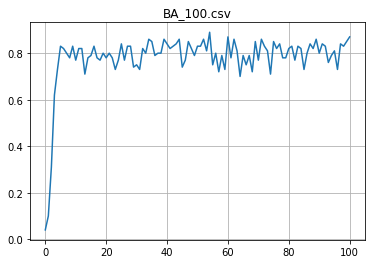

In [12]:
csv = 'BA_100.csv'
# csv = 'ER_100.csv'
# csv = 'WS_100.csv'
# np.random.seed(1)
# random.seed(1)

paramet = {
        'betta': 0.4, # infect rate 
        'gamma': 0.2, # rec rate 
    }
N = 100
r = 2 # dummy

# np.random.seed(787)
# random.seed(4)

a = EpidemicGraph(N,r,paramet,I=4, grid_size=[30,30])  # net='Uniform Grid'
a.load_csv(csv, 4)
print(calc_R0(a.G, paramet))
G = a.G
##########################################
# plt.figure(figsize=(8, 8))
# nx.draw(G, with_labels=False)
# plt.show()
##########################################
timing = a.run(100)
# a.G[0]
asd = a.hist2pandas()
# asd.plot()
asd1 = asd['I']/N
asd1.plot(grid=True)
plt.title(csv)

tm = np.array(timing)
tm = tm - tm[0]
asd2 = asd[['I']]
asd2['dI'] = asd2['I'].shift(-1) - asd2['I']
asd2['dt'] = tm
asd2['dI_mean'] = asd2['dI'].rolling(5, center=True).mean().abs()
asd2

In [ ]:
tm = np.array(timing)
tm = tm - tm[0]
asd2 = asd[['I']]
asd2['dI'] = asd2['I'].shift(-1) - asd2['I']
asd2['dt'] = tm
asd2['dI_mean'] = asd2['dI'].rolling(5, center=True).mean().abs()
asd2

In [ ]:
# tm = np.array(timing)
# tm = tm - tm[0]
asd2['dI'].rolling(3).mean()

In [ ]:
csv = 'BA_100.csv'
csv = 'ER_100.csv'
# csv = 'WS_100.csv'
def monte(n, r, paramet, nstep=300):
    listt = []
    for i in range(n):
        a = EpidemicGraph(N,r,paramet,I=4, grid_size=[30,30])  # net='Uniform Grid'
        a.load_csv(csv, I0 = 4)
        a.run(nstep)
        listt.append(a.hist2pandas())
        print(i+1, end=' ')
    print()
    df = listt[0]
    del listt[0]
    for v in listt:
        df += v
    df /= n
    return df

np.random.seed(2)
random.seed(2)
asd_monte = monte(5*2, r, paramet, 100)
asd1 = asd_monte['I']/N
asd1.plot(grid=True)
calc_R0(a.G, paramet)
plt.title(csv)


In [ ]:
asd = asd_monte[['I']]
asd.plot()
# asd_monte.to_csv('monte_random_15.csv')

In [ ]:
print(sample(list(a.G[0]), len(a.G[0])))
list(a.G[0])


In [ ]:
nod = a.G.node[0]
# nod['state'] = 'I1_a'
diag.next(a.G, 0)
a.G.node[0]['state'] = a.G.node[0]['next_state']
a.G.node[0]

In [ ]:
uniform(0,[10,1],2)
randint(0, 100,10)
s= sample(range(20), 10)
# print(s[:5], s[5:])
print(s)
del s[1]
s